In [1]:
from skimage.metrics import structural_similarity #For Finding DIfference Between Two Images, Original Image Is Needed
import imutils #For Contouring
import cv2 #Computer Vison
from PIL import Image

In [2]:
# img = Image.open('spotdiff4.jpg')

# # Get the width and height of the image
# width, height = img.size

# # Define the coordinates of the two parts    #Images alligned vertically were not getting cropped so modified the code below.
# part1 = (0, 0, width/2, height)
# part2 = (width/2, 0, width, height)

# # Crop the image into two parts
# img1 = img.crop(part1)
# img2 = img.crop(part2)

In [3]:
#cuttle-environment-set-config spot-api route=/api/predict method=POST

img = Image.open('spotdiff1.jpg') #cuttle-environment-get-config spot.api request.files['filee']

# Get the width and height of the image
width, height = img.size

if height<width:
    part1 = (0, 0, width/2, height)
    part2 = (width/2, 0, width, height)     #If Height is More than Width That It Will Cut The Image Horizontally and visa-versa
    img1 = img.crop(part1)
    img2 = img.crop(part2)
else:
    midpoint = height // 2
    part1 = (0, 0, width, midpoint)
    part2 = (0, midpoint, width, height)
    img1 = img.crop(part1)
    img2 = img.crop(part2)

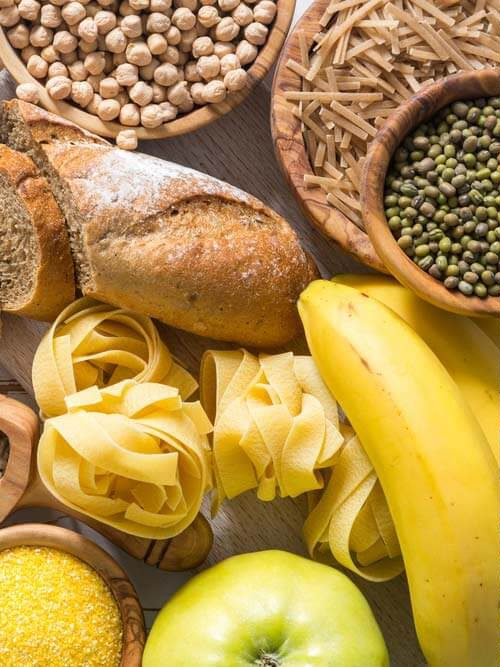

In [4]:
img1

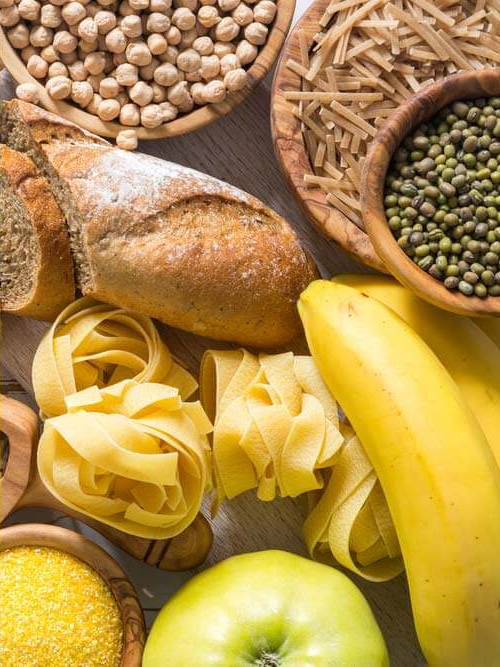

In [5]:
img2

In [6]:
img1.save('image1.png')
img2.save('image2.png')

In [7]:
l = [img1,img2]
for i in l:
    print(f'Format Of {i} : {i.format}')
    print(f'Format Of {i} : {i.size}')
    
#Here The Size And The Format Of The Files Are Same, So We Won't Be Resizing Or Changing The Format Of The Files.

Format Of <PIL.Image.Image image mode=RGB size=500x667 at 0x1B4C4F36520> : None
Format Of <PIL.Image.Image image mode=RGB size=500x667 at 0x1B4C4F36520> : (500, 667)
Format Of <PIL.Image.Image image mode=RGB size=500x667 at 0x1B4C6F2B130> : None
Format Of <PIL.Image.Image image mode=RGB size=500x667 at 0x1B4C6F2B130> : (500, 667)


In [8]:
img1 = cv2.imread("image1.png")
img2 = cv2.imread("image2.png")

In [9]:
img1_grey = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_grey = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [10]:
(score, diff) = structural_similarity(img1_grey, img2_grey, full=True)
diff = (diff * 255).astype("uint8") #Multiplying by 255 for normalization
print(f"SSIM: {round(score*100, 2)} %")

SSIM: 91.77 %


In [11]:
thold = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnt = cv2.findContours(thold.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnt = imutils.grab_contours(cnt)

In [12]:
for c in cnt:
    (x,y,w,h) = cv2.boundingRect(c)
    cv2.rectangle(img1, (x,y), (x+w, y+h), (0,0,255), 2)
    cv2.rectangle(img2, (x,y), (x+w, y+h), (0,0,255), 2)

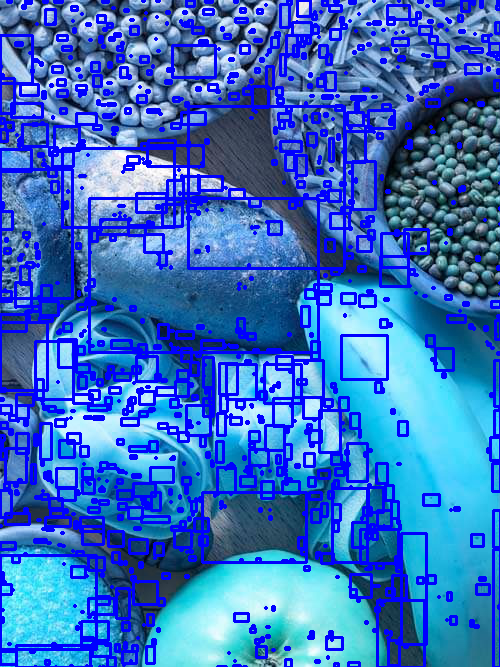

In [13]:
Image.fromarray(img1)

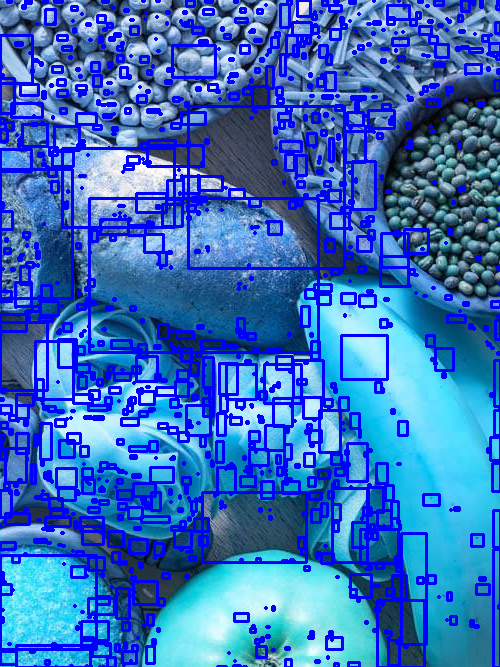

In [14]:
Image.fromarray(img2)

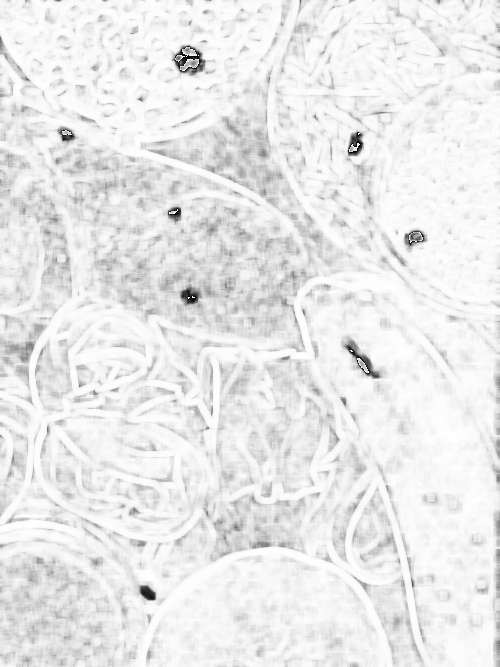

In [15]:
Image.fromarray(diff) #cuttle-environment-set-config spot-api response

#This Is The Overall Difference Between Two Images in Black.

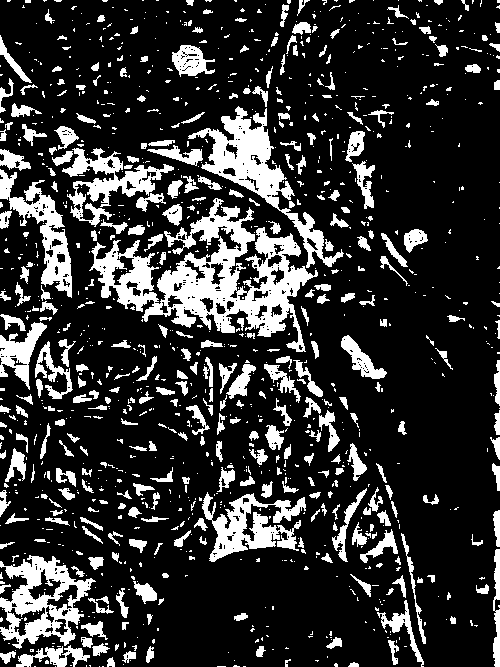

In [16]:
Image.fromarray(thold)